# Differentiation Project
### Continuous or discrete? Comparing models of cellular differentiation
File: Framework_Discrete_to_continuous.ipynb <br>
Author: Valentin Jacot-Descombes and Peter Ashcroft <br>
E-mail: vjd.jako@gmail.com

In [5]:
# 1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from fenics import *
from mshr import *
from ufl import nabla_grad, nabla_div, grad
from scipy.interpolate import interp2d
from mshr import *
import os
import sys
sys.path.append(os.path.realpath('..'))

%matplotlib notebook

In [6]:
# 2
nu = 0.1
cDiff = 0.0027
dbar = 1.6925
cS = 0.5
N = 40*3 # Dimension of the grid
M = 100 # Dimension of the matrices
xmax = 1
tol = 1e-10


In [7]:
# 3
def fun(x, y, muX, muY, sigma):
    return gaussian2d(x, y, muX, muY, sigma, sigma)


def gaussian(x, mu, sigma):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)


def gaussian2d(x, y, muX, muY, sigmaX, sigmaY):
    return 1 / (sigmaX * sigmaY * np.sqrt(2 * np.pi)) * np.exp(
        -0.5 * (((x - muX) / sigmaX) ** 2 + ((y - muY) / sigmaY) ** 2))

# N: dimension to, M: dimension from
def interpMat2(N, M, mat):
    xx = np.arange(0, 1.0, 1/(N+1))
    yy = np.arange(0, 1.0, 1/(N+1))
    x = np.arange(0, 1.0, 1/M)
    y = np.arange(0, 1.0, 1/M)
    f = interp2d(x,y,mat)
    mat = f(xx,yy)
    mat = mat.T
    mat = mat.reshape(np.prod(mat.shape))
    return mat

# r = Expression('1 + pow(2, x[0])', degree=2)
# a = Expression('0.5 * (1 - x[0]/xmax)', degree=2, xmax=xmax)
# c_k = Expression('x[0]*x[0]', degree=2)


In [8]:
# 4
x = np.arange(0, 1.0, 1 / M)
y = np.arange(0, 1.0, 1 / M)
X, Y = np.meshgrid(x, y)
zs = np.array(-fun(np.ravel(X), np.ravel(Y), 0.2, 0.5, 0.15)) * 2
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.5, 0.3, 0.1)) *0.7
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.5, 0.7, 0.1))
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.8, 0.3, 0.1)) * 0.8
zs += np.array(-fun(np.ravel(X), np.ravel(Y), 0.8, 0.7, 0.1)) * 1.1


[-0.05636114 -0.06146433 -0.06673266 ... -0.15437131 -0.12958597
 -0.10769815]
[0.99872896 0.99861387 0.99849506 ... 0.99651866 0.99707761 0.99757122]


<IPython.core.display.Javascript object>


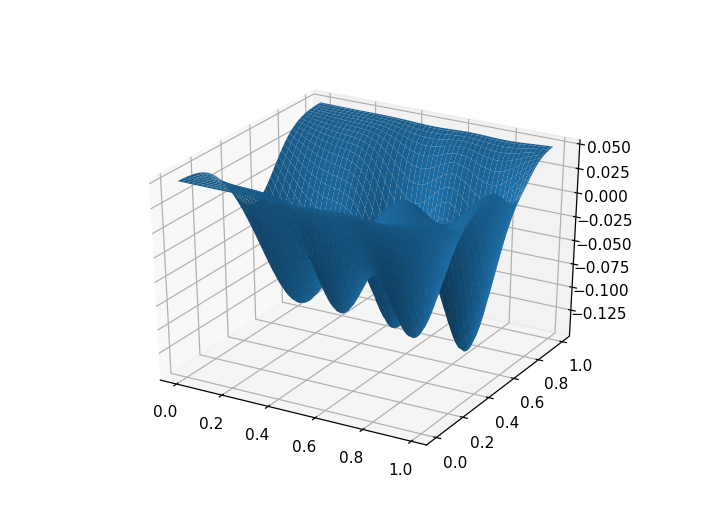

<IPython.core.display.Javascript object>


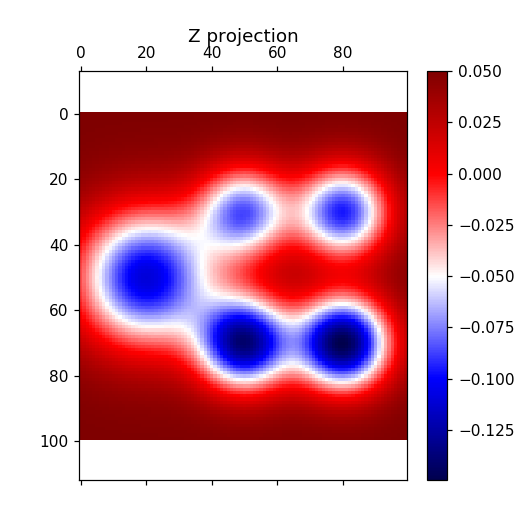

<IPython.core.display.Javascript object>


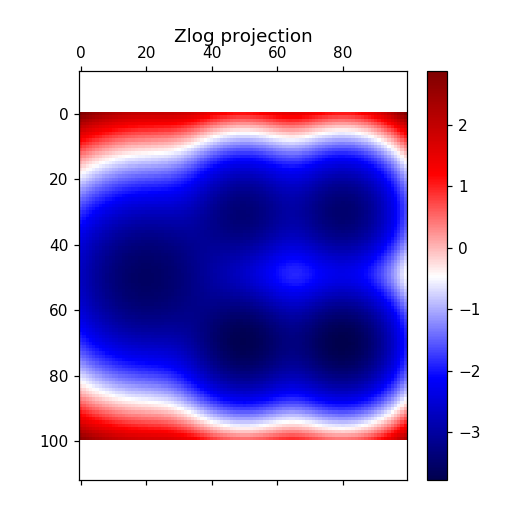

<IPython.core.display.Javascript object>


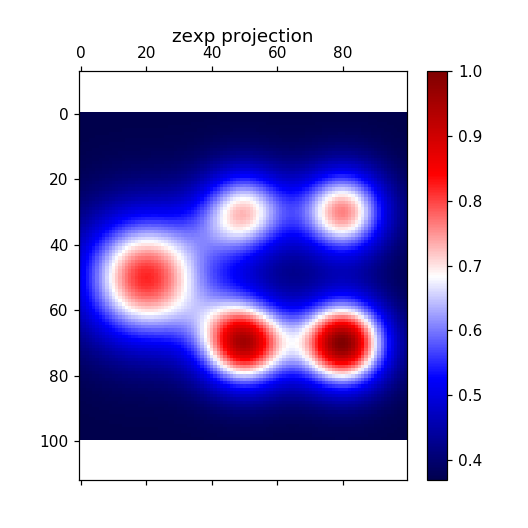

<IPython.core.display.Javascript object>


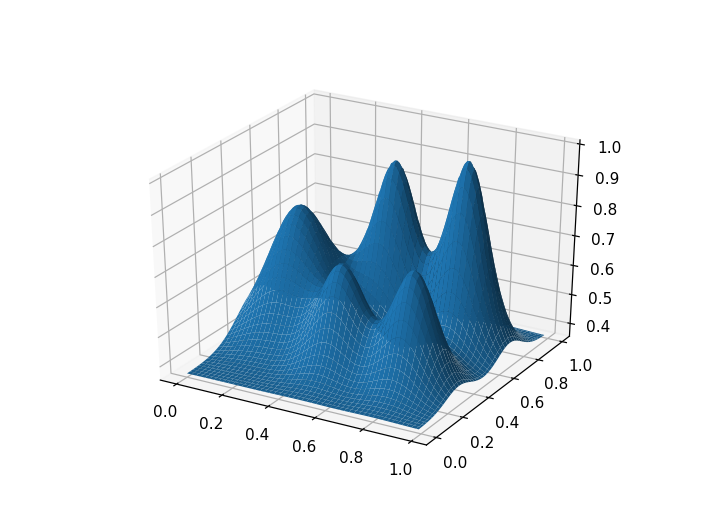

In [9]:
# 4
%matplotlib notebook
print(zs)
print((zs-min(zs))/-min(zs))
Z = (zs-max(zs))/-min(zs)
Z = Z.reshape(X.shape)*0.2
Z +=0.05
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.matshow(Z, aspect=1, cmap=plt.get_cmap('seismic'))
plt.title('Z projection')
plt.colorbar()
plt.axis('equal')
plt.show()

zlog = -np.log(np.abs(zs))
zlog = zlog.reshape(X.shape)
plt.matshow(zlog, aspect=1, cmap=plt.get_cmap('seismic'))
plt.title('Zlog projection')
plt.colorbar()
plt.axis('equal')
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(X, Y, zlog)
zexp = np.exp(-((zs-min(zs))/-min(zs)))
zexp = zexp.reshape(X.shape)
plt.matshow(zexp, aspect=1, cmap=plt.get_cmap('seismic'))
plt.title('zexp projection')
plt.colorbar()
plt.axis('equal')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, zexp)



In [10]:
# 5
parameters['reorder_dofs_serial'] = False
mesh = UnitSquareMesh(N, N)  # 8X8 rectangles, each divided in 2 triangle, hence 128 cells, and 81 (9^2) vertices
Vhat = FunctionSpace(mesh, 'P', 1)  # P returns Lagrangian polynomials, 1 is the degree of the FE

<IPython.core.display.Javascript object>


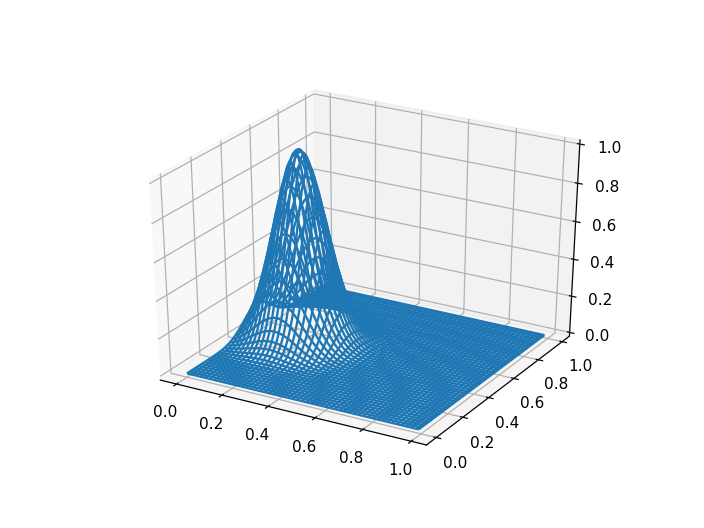

In [11]:
# 6
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 1.0, 1 / M)
y = np.arange(0, 1.0, 1 / M)
X, Y = np.meshgrid(x, y)
ui = np.array(fun(np.ravel(X), np.ravel(Y), 0.2, 0.5, 0.1))
ui = (ui-min(ui))/max(ui)
Ui = ui.reshape(X.shape)
# Z2 = z2.reshape(X.shape)
# ax.plot_surface(X, Y, Ui) 
# ax.plot_surface(X, Y, Z2, linewidth=1) 
ax.plot_wireframe(X, Y, Ui) 



## Class functionFactory(Vhat, N, M)

Vhat is the function space buit on the mesh<br>
N is the dimension of the mesh<br>
M is the dimension of the input matrix<br>
The instance of the class can be directly evaluated by passing it a matrix, and the desired fenics function si returned.<br>
The function <i>plot(mat, title)</i> plots the function on the space.

In [13]:
# 6
from Dependencies.functionFactory import *
# from makeFunction import * 
factory = functionFactory(Vhat, N, M)

<IPython.core.display.Javascript object>


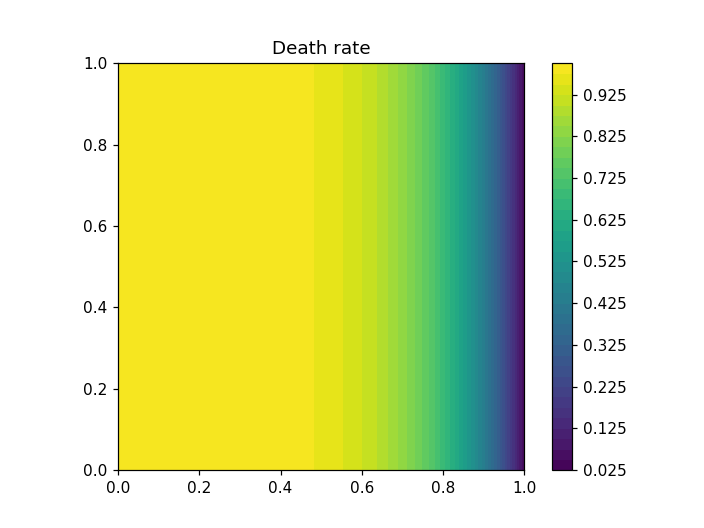

<IPython.core.display.Javascript object>


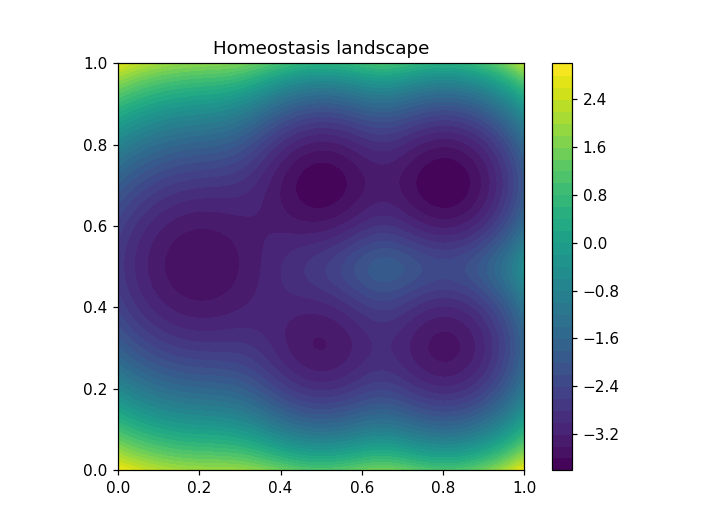

<IPython.core.display.Javascript object>


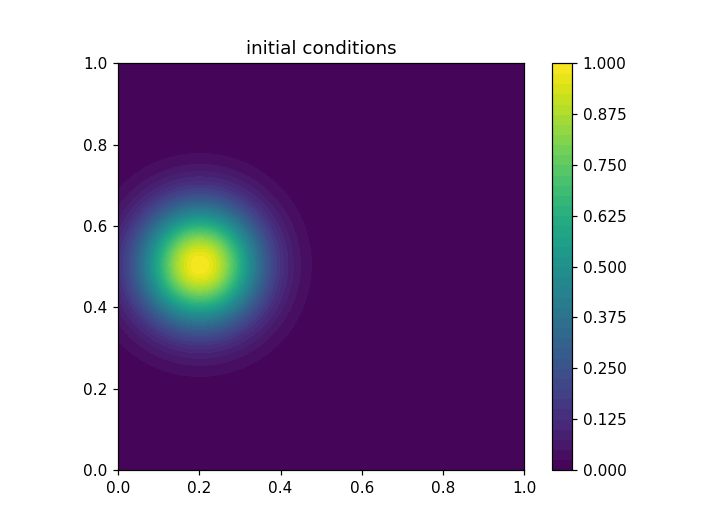

<IPython.core.display.Javascript object>


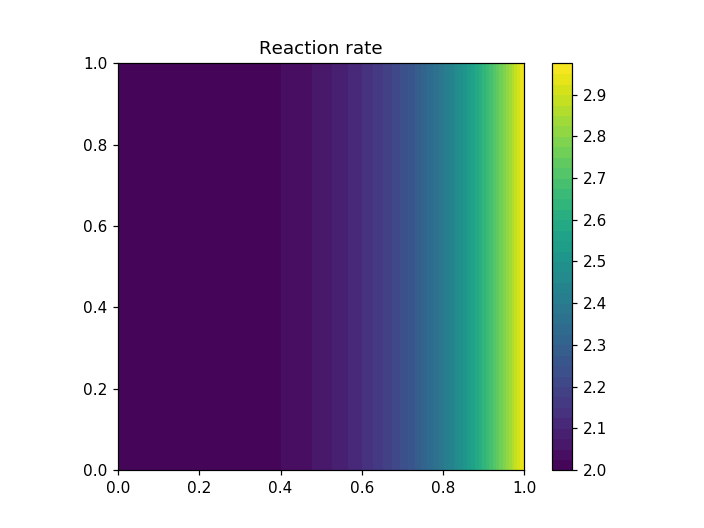

<IPython.core.display.Javascript object>


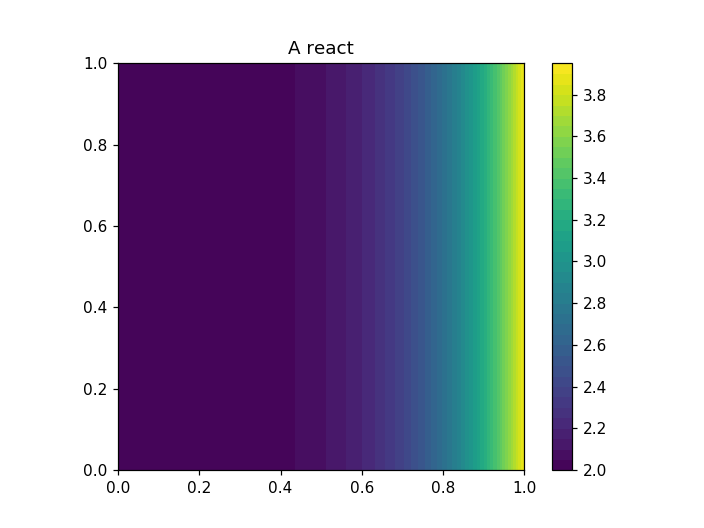

In [14]:
# 6
%matplotlib notebook
# uhmst = zexp.reshape(X.shape)
# uhmst[uhmst<0.4]=1e-15
# cDth = 1. / uhmst.T
def dth(x_, y_):
    return 1-x_**5


def rct(x_, y_):
    return 2 + x_**4


cDth = np.array(dth(np.ravel(X), np.ravel(Y)))
cDthMat = cDth.reshape(X.shape)
cDthFct = factory(cDth)
factory.plot(cDth, title='Death rate')

zlog = -np.log(np.abs(zs))
zlogFct = factory(zlog)
factory.plot(zlog,title='Homeostasis landscape')


# Very basic initial conditon
UiFct = factory(0.1*Ui.T)
factory.plot(Ui.T, title='initial conditions')




cRctMat = np.array(rct(np.ravel(X), np.ravel(Y)))
cRctMat = cRctMat.reshape(X.shape)
cRctFct = factory(cRctMat.T)
factory.plot(cRctMat.T,title='Reaction rate')

def A_react(u_):
    uv = u_.vector().get_local()
    return (cRctFct.vector().get_local() -cDthFct.vector().get_local())*uv


def A_react_no_U():
    return (cRctFct.vector().get_local() -cDthFct.vector().get_local())


def A_react_z(z_):
    return (cRctFct.vector().get_local() -cDthFct.vector().get_local())*z_

factory.plot(cRctMat.T - cDthMat.T + 1,title='A react')


In [15]:
# 6
def R1(u_):
    uv = u_.vector().get_local()
    cDth = cDthFct.vector().get_local()
    cRct = cRctFct.vector().get_local()
    temp = (cDth * uv)
    temp[temp > dbar] = dbar
    temp = (1 - temp)*cRct
    return temp


def v1():
    return zlogFct


def boundary(x, on_boundary):
    return on_boundary


# Differtiation rate
# Needs to be 1d --> np-ravel
def a(x_,y_):
    return 0.5*(1 - x_/max(x_))

# PT/ direction of the differentiation x-direction
def c_k_x(x_, y_):
    return x_**2


# PT/ direction of the differentiation, y-direction
def c_k_y(x_, y_):
    return 0*y_

<IPython.core.display.Javascript object>


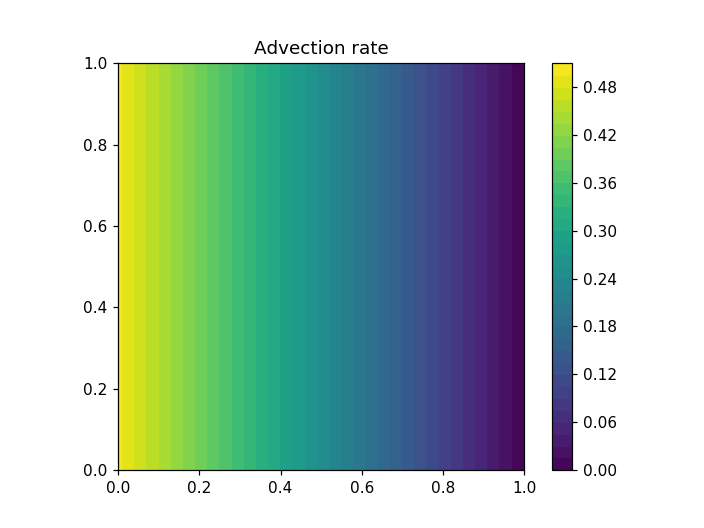

<IPython.core.display.Javascript object>


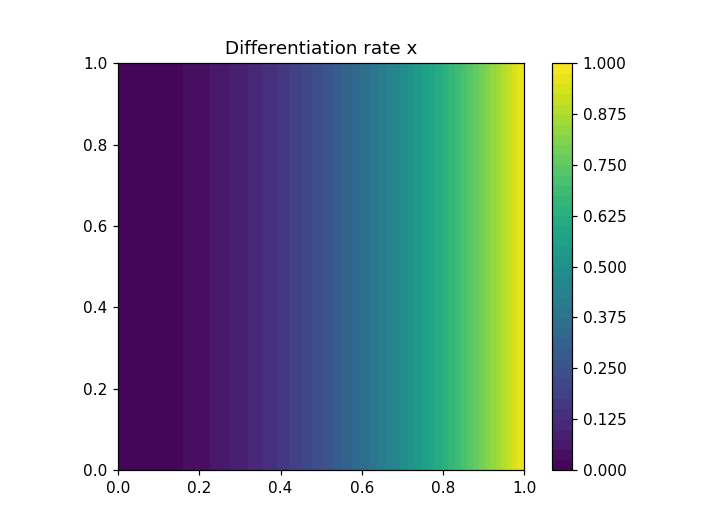

In [16]:
# 6
cAdvMat = np.array(a(np.ravel(X), np.ravel(Y)))
cAdvMat = cAdvMat.reshape(X.shape)
cAdvFct = factory(cAdvMat.T)
factory.plot(cAdvMat.T, title='Advection rate')

cAMat_x = np.array(c_k_x(np.ravel(X), np.ravel(Y)))
cAMat_x = cAMat_x.reshape(X.shape)
cAFct_x = factory(cAMat_x.T)
factory.plot(cAMat_x.T, title='Differentiation rate x')


cAMat_y = np.array(c_k_y(np.ravel(X), np.ravel(Y)))
cAMat_y = cAMat_y.reshape(Y.shape)
cAFct_y = factory(cAMat_y.T)
# factory.plot(cAMat_y.T, title='Differentiation rate y')
# factory.plot(cAMat.T*cAMat_y.T, title='Differentiation rate')

def v2_x(u_):
    cAdv = cAdvFct.vector().get_local()
    cA = cAFct_x.vector().get_local()
    cRct = cRctFct.vector().get_local()
    return cA*(1-cAdv)*cRct

def v2_y(u_):
    cAdv = cAdvFct.vector().get_local()
    cA = cAFct_y.vector().get_local()
    cRct = cRctFct.vector().get_local()
    return cA*(1-cAdv)*cRct

t = 0.40: difference = 3.66
t = 0.80: difference = 2.35
t = 1.20: difference = 0.428
t = 1.60: difference = 0.34
t = 2.00: difference = 0.184
t = 2.40: difference = 0.0805
t = 2.80: difference = 0.0322
t = 3.20: difference = 0.0125
t = 3.60: difference = 0.00531
t = 4.00: difference = 0.00239
t = 4.40: difference = 0.00117
t = 4.80: difference = 0.000574
t = 5.20: difference = 0.000277
t = 5.60: difference = 0.000132
t = 6.00: difference = 6.25e-05
t = 6.40: difference = 2.93e-05
t = 6.80: difference = 1.37e-05
t = 7.20: difference = 6.61e-06
t = 7.60: difference = 3.18e-06
t = 8.00: difference = 1.52e-06
t = 8.40: difference = 7.25e-07


<IPython.core.display.Javascript object>


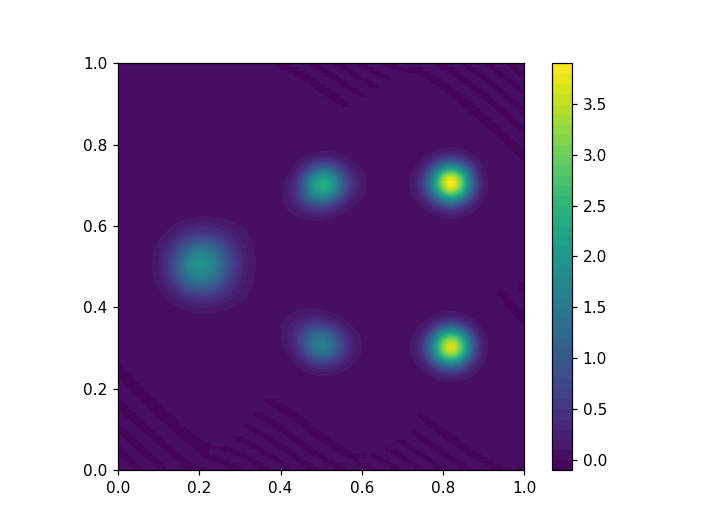

In [18]:
# 7
# %matplotlib notebook

zero = Constant(0)
bc = DirichletBC(Vhat, zero, boundary)

u = TrialFunction(Vhat)  # here it is just defined as an unknown to define a.
v = TestFunction(Vhat)
u_n = Function(Vhat)
R = Function(Vhat)
V2Fct_x = Function(Vhat) 
V2Fct_y = Function(Vhat) 

u_n = interpolate(UiFct, Vhat) # initial value

# plt.figure()
# p = plot(u_n)
# plt.colorbar(p)
# plt.show()

T = 80.0  # final time
num_step = 200
dt = T / num_step
k = 1./dt
tol = 1e-6

R.vector()[:] = R1(u_n)
V2Fct_x.vector()[:] = v2_x(u_n)
V2Fct_y.vector()[:] = v2_y(u_n)

F = dot((u-u_n)*k,v)*dx + nu * dot(grad(u), grad(v)) * dx + dot(nabla_grad(v1())*u, nabla_grad(v)) * dx - \
    dot( R*u, v) * dx - dot(V2Fct_x*u, v.dx(0))* dx - dot(V2Fct_y*u, v.dx(1))* dx


u = Function(Vhat)
a = lhs(F)
L = rhs(F)
t = 0

## uncomment to save the solution onto pvd files. Can be used to plot dynamically in paraview
# vtkfile = File('framework/solution.pvd')
# vtkfile << (u_n, t)

for n in range(num_step):
    R.vector()[:] = R1(u_n)
    V2Fct_x.vector()[:] = v2_x(u_n)
    V2Fct_y.vector()[:] = v2_y(u_n)
    t+=dt
    solve(a == L, u, bc)
    u_e = interpolate(u_n, Vhat)
    error = np.abs(u_e.vector().get_local() - u.vector().get_local()).max()
    print('t = %.2f: difference = %.3g' % (t, error)) #relative errror
    if (error < tol):
        break
#     vtkfile << (u, t)

    u_n.assign(u)


plt.figure()
p = plot(u)
plt.colorbar(p)
plt.show()


<IPython.core.display.Javascript object>


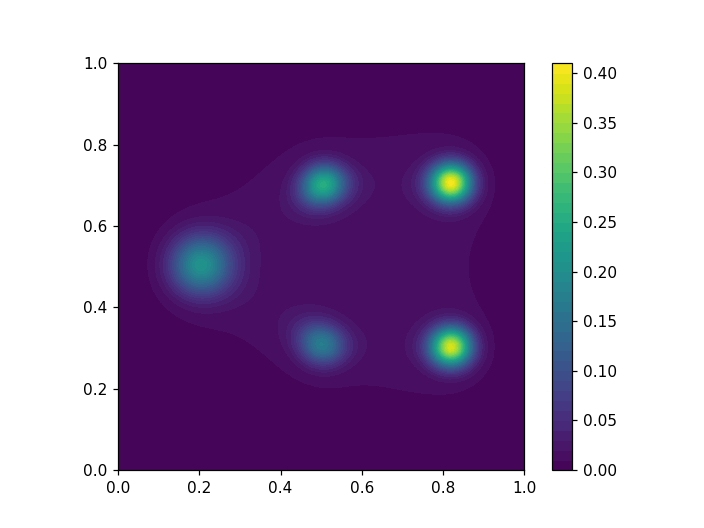

In [19]:
# Equation (11)
zero = Constant(0)
bc = DirichletBC(Vhat, zero, boundary)

phi = TrialFunction(Vhat)  # here it is just defined as an unknown to define a.
v = TestFunction(Vhat)
u_n = Function(Vhat)
A = Function(Vhat)
u_n = interpolate(UiFct, Vhat) # initial value

T = 80.0  # final time
num_step = 200
dt = T / num_step
k = 1./dt
tol = 1e-6

zlogFct = factory(zlog)
# A.vector()[:] = A_react(zlogFct)
A.vector()[:] = A_react(u)

# F = -dot(grad(phi), grad(v))*dx + dot(A, v)*dx + nu* dot(grad(zlogFct), grad(v))*dx
F = -dot(grad(phi), grad(v))*dx + dot(A, v)*dx + nu* dot(grad(u), grad(v))*dx

# dot((u-u_n)*k,v)*dx + nu * dot(grad(u), grad(v)) * dx + dot(nabla_grad(v1())*u, nabla_grad(v)) * dx - \
#     dot( R*u, v) * dx - dot(V2Fct_x*u, v.dx(0))* dx - dot(V2Fct_y*u, v.dx(1))* dx

phi = Function(Vhat)
a = lhs(F)
L = rhs(F)
solve(a == L, phi, bc)

# phi.vector()[:] = np.log2(phi.vector()[:]+0.2)

plt.figure()
p = plot(phi)
plt.colorbar(p)
plt.show()



<IPython.core.display.Javascript object>


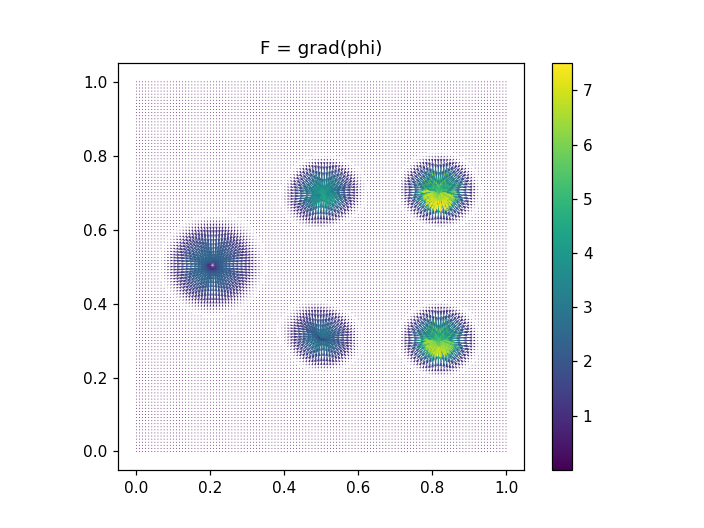

<IPython.core.display.Javascript object>


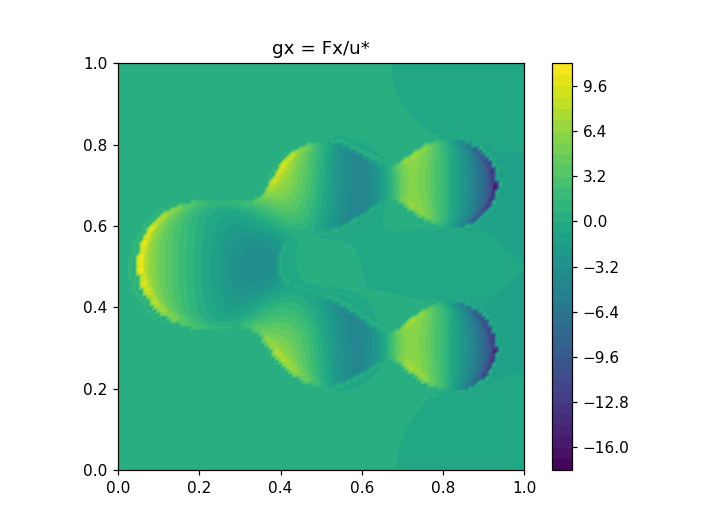

<IPython.core.display.Javascript object>


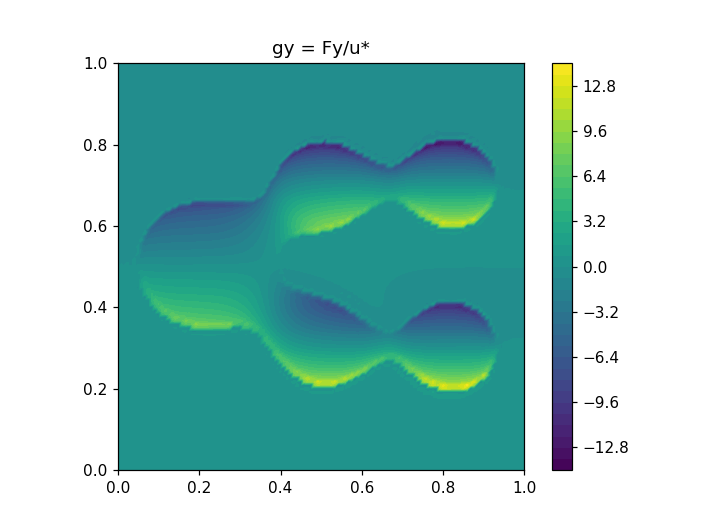

<IPython.core.display.Javascript object>


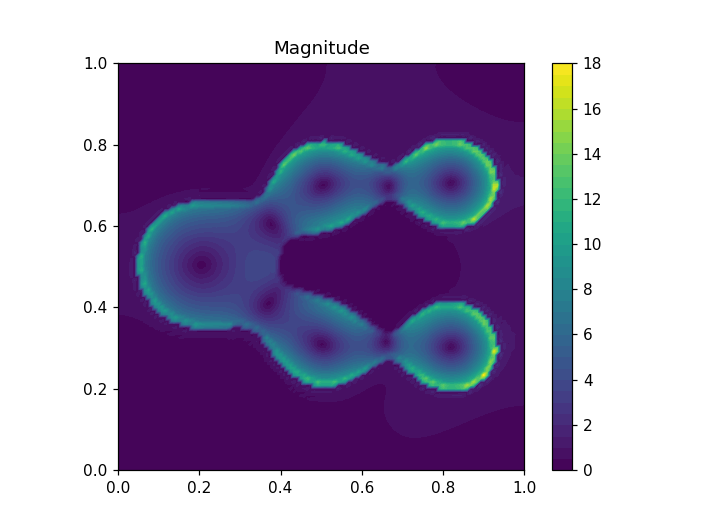

<IPython.core.display.Javascript object>


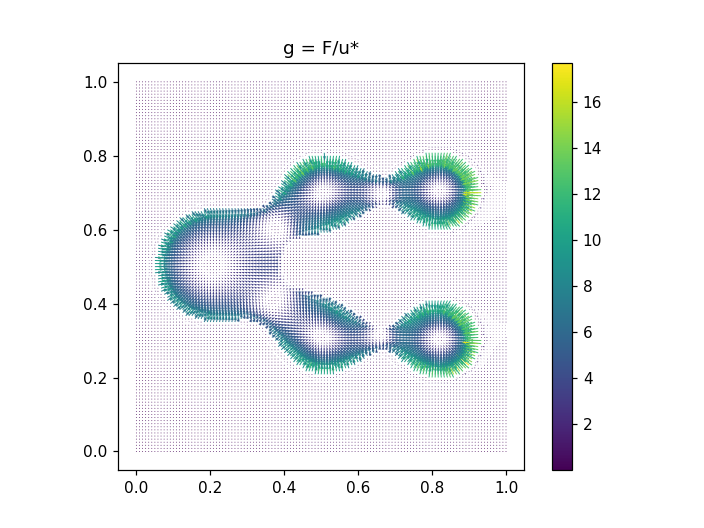

In [20]:
# Calculation of the direction of the differentiation
Vmesh = Vhat.mesh()
Q = VectorFunctionSpace(Vmesh, 'CG', 1)
# f = Function(Q)
f = project(grad(phi),Q)


plt.figure()
p = plot(f)
plt.colorbar(p)
plt.title('F = grad(phi)')
plt.show()



nx = Expression(('1.0','0.0'),degree=1)
ny = Expression(('0.0','1.0'),degree=1)
u2 = Function(Vhat)
u2.assign(u)
uv= u2.vector().get_local()
uv[uv<0.01] = 0.1
u2.vector()[:] = uv

gx = dot(f,nx)/u2
gy = dot(f,ny)/u2

gx = project(gx,Vhat)
gy = project(gy,Vhat)


plt.figure()
p = plot(gx)
plt.colorbar(p)
plt.title('gx = Fx/u*')
plt.show()

plt.figure()
p = plot(gy)
plt.colorbar(p)
plt.title('gy = Fy/u*')
plt.show()

magn = Function(Vhat)
magn.vector()[:] = np.sqrt(gx.vector()[:]**2+gy.vector()[:]**2)
plt.figure()
p = plot(magn)
plt.colorbar(p)
plt.title('Magnitude')
plt.show()

g = Function(Q)
dim = Q.dim()
ga = np.zeros(dim)
x  = gx.vector()[:]
y  = gy.vector()[:]

ga[:14641]  = x
ga[14641:] = y

g.vector().set_local(ga)
# g = interpolate(g,Q)
plt.figure()
p = plot(g)
plt.colorbar(p)
plt.title('g = F/u*')
plt.show()




<IPython.core.display.Javascript object>


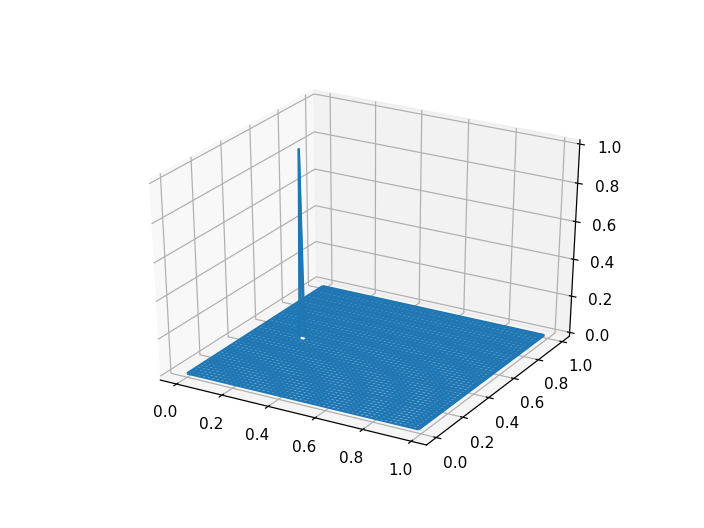

<IPython.core.display.Javascript object>


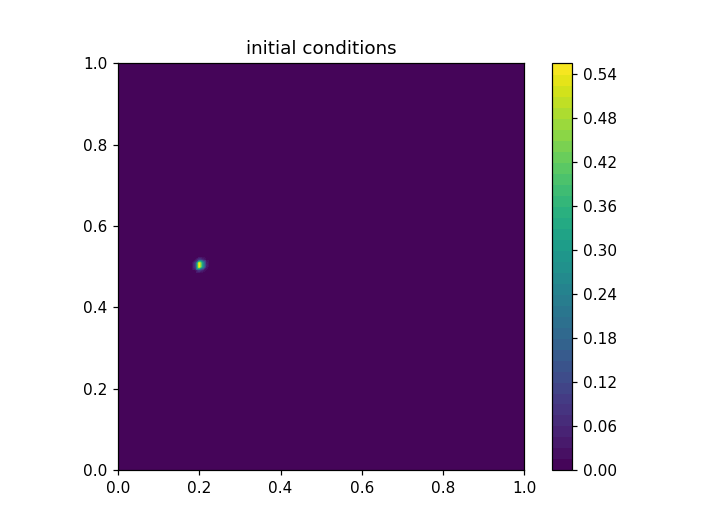

In [21]:
# just a point source to be used as an initial condition
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.arange(0, 1.0, 1 / M)
y = np.arange(0, 1.0, 1 / M)
X, Y = np.meshgrid(x, y)
ui = np.array(fun(np.ravel(X), np.ravel(Y), 0.2, 0.5, 0.005))
ui = (ui-min(ui))/max(ui)
deltaUi = ui.reshape(X.shape)
# Z2 = z2.reshape(X.shape)
# ax.plot_surface(X, Y, Ui) 
# ax.plot_surface(X, Y, Z2, linewidth=1) 
ax.plot_wireframe(X, Y, deltaUi) 
deltaUiFct = factory(deltaUi.T)
factory.plot(deltaUi.T, title='initial conditions')

<IPython.core.display.Javascript object>


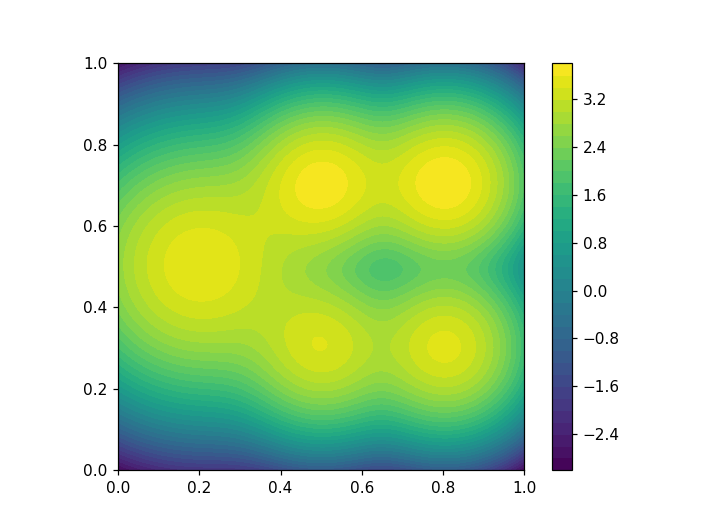

t = 1.60: difference = 2.88
t = 3.20: difference = 0.969
t = 4.80: difference = 0.475
t = 6.40: difference = 0.216
t = 8.00: difference = 0.0967
t = 9.60: difference = 0.0433
t = 11.20: difference = 0.0194
t = 12.80: difference = 0.00867
t = 14.40: difference = 0.00388
t = 16.00: difference = 0.00174
t = 17.60: difference = 0.000777
t = 19.20: difference = 0.000348
t = 20.80: difference = 0.000156
t = 22.40: difference = 6.96e-05
t = 24.00: difference = 3.12e-05
t = 25.60: difference = 1.39e-05
t = 27.20: difference = 6.24e-06
t = 28.80: difference = 2.79e-06
t = 30.40: difference = 1.25e-06
t = 32.00: difference = 5.59e-07


<IPython.core.display.Javascript object>


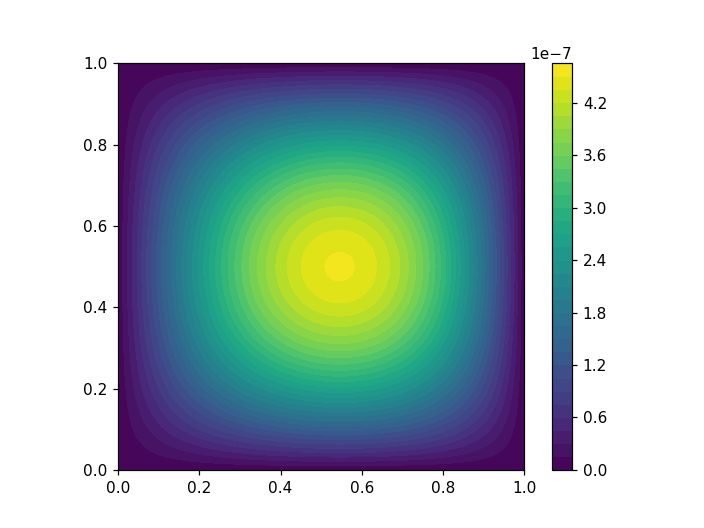

In [23]:
# Not steady state
uf = TrialFunction(Vhat)  # here it is just defined as an unknown to define a.
v = TestFunction(Vhat)
u_n = Function(Vhat)
A = Function(Vhat)
zlogFct = factory(-zlog)
u_n = interpolate(zlogFct, Vhat) # initial value


# A.vector()[:] = A_react(zlogFct)
A.vector()[:] = A_react_no_U()

plt.figure()
p = plot(u_n)
plt.colorbar(p)
plt.show()

T = 80.0  # final time
num_step = 50
dt = T / num_step
k = 1./dt
tol = 1e-6

F = dot((uf-u_n)*k,v)*dx - dot(A*uf, v)*dx + nu* dot(grad(uf), grad(v))*dx - \
    dot(10*gx*uf, grad(v)[0])* dx(0) - \
    dot(10*gy*uf, grad(v)[1])* dx(1)

uf = Function(Vhat)
a = lhs(F)
L = rhs(F)
# solve(a == L, uf, bc)
t=0
for n in range(num_step):
    t+=dt
    solve(a == L, uf, bc)
    u_e = interpolate(u_n, Vhat)
    error = np.abs(u_e.vector().get_local() - uf.vector().get_local()).max()
    print('t = %.2f: difference = %.3g' % (t, error)) #relative errror
    if (error < tol):
        break
#     print(max(u.vector()))
#     print(min(u.vector()))
#     vtkfile << (u, t)
#     plt.figure()
#     p = plot(u)
#     plt.colorbar(p)
#     plt.show()
    u_n.assign(uf)
# uf.vector()[:] = np.log2(uf.vector()[:]+0.01)

plt.figure()
p = plot(uf)
plt.colorbar(p)
plt.show()



<IPython.core.display.Javascript object>


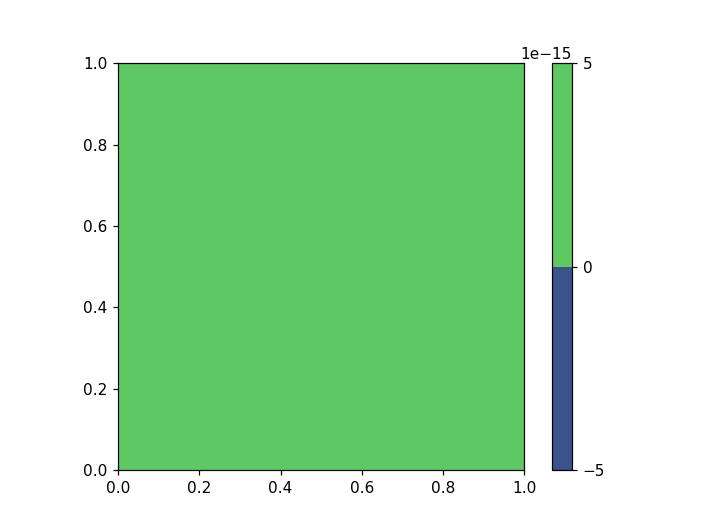

In [22]:
# Steady state

uf = TrialFunction(Vhat)  # here it is just defined as an unknown to define a.
v = TestFunction(Vhat)
u_n = Function(Vhat)
A = Function(Vhat)
u_n = interpolate(zlogFct, Vhat) # initial value

zlogFct = factory(zlog)
# A.vector()[:] = A_react(zlogFct)
A.vector()[:] = A_react_no_U()

# plt.figure()
# p = plot(A)
# plt.colorbar(p)
# plt.show()

T = 80.0  # final time
num_step = 50
dt = T / num_step
k = 1./dt
tol = 1e-6

F = dot(A*uf, v)*dx - nu* dot(grad(uf), grad(v))*dx - \
    uf*dot(g,grad(v))*dx

uf = Function(Vhat)
a = lhs(F)
L = rhs(F)
solve(a == L, uf, bc)


plt.figure()
p = plot(uf)
plt.colorbar(p)
plt.show()

